# Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt



# Datasets

In [43]:
people_df = pd.read_csv('../data/people.csv')
salary_df = pd.read_csv('../data/salary.csv')
description_df = pd.read_csv('../data/descriptions.csv')

## Exploratory Data Analysis (EDA)

### People

In [44]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   375 non-null    int64  
 1   Age                  370 non-null    float64
 2   Gender               370 non-null    object 
 3   Education Level      370 non-null    object 
 4   Job Title            370 non-null    object 
 5   Years of Experience  373 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.7+ KB


In [45]:
people_df.head()

,id,Age,Gender,Education Level,Job Title,Years of Experience
0,0,32.0,Male,Bachelor's,Software Engineer,5.0
1,1,28.0,Female,Master's,Data Analyst,3.0
2,2,45.0,Male,PhD,Senior Manager,15.0
3,3,36.0,Female,Bachelor's,Sales Associate,7.0
4,4,52.0,Male,Master's,Director,20.0


In [46]:
people_df.describe()

,id,Age,Years of Experience
count,375.000000,370.000000,373.000000
mean,187.000000,37.437838,10.030831
std,108.397417,7.080465,6.557007
min,0.000000,23.000000,0.000000
25%,93.500000,31.250000,4.000000
50%,187.000000,36.000000,9.000000
75%,280.500000,44.000000,15.000000
max,374.000000,53.000000,25.000000


#### Nulos

In [47]:
people_df[people_df.isna().any(axis=1)]

,id,Age,Gender,Education Level,Job Title,Years of Experience
51,51,33.0,Male,Master's,NaN,7.0
60,60,51.0,Female,Master's,NaN,23.0
139,139,43.0,Female,NaN,Senior Product Marketing Manager,14.0
172,172,NaN,NaN,NaN,NaN,NaN
219,219,40.0,NaN,Bachelor's,Senior Sales Representative,12.0
221,221,NaN,Female,Bachelor's,Junior Social Media Specialist,3.0
225,225,40.0,NaN,Bachelor's,Senior Marketing Manager,11.0
235,235,32.0,NaN,Bachelor's,Junior Sales Representative,3.0
260,260,NaN,NaN,NaN,NaN,NaN
261,261,37.0,Female,NaN,Senior Financial Manager,10.0


Check with descriptions

#### Value counts

In [48]:
people_df['Education Level'].value_counts()

Education Level
Bachelor's    222
Master's       97
PhD            51
Name: count, dtype: int64

In [49]:
people_df['Job Title'].value_counts()

Job Title
Director of Marketing             12
Director of Operations            10
Senior Business Analyst           10
Senior Marketing Manager           9
Senior Marketing Analyst           9
                                  ..
Junior Social Media Specialist     1
Junior Operations Coordinator      1
Senior HR Specialist               1
Director of HR                     1
Junior Financial Advisor           1
Name: count, Length: 173, dtype: int64

In [50]:
people_df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

#### How many words does each job title have?


In [51]:
people_df['Job Title'].str.split().str.len().value_counts().sort_index()

Job Title
1.0      6
2.0     80
3.0    253
4.0     30
5.0      1
Name: count, dtype: int64

In [52]:
people_df[people_df['Job Title'].str.split().str.len() == 1]['Job Title'].value_counts()

Job Title
Recruiter     2
Director      1
CEO           1
Accountant    1
Copywriter    1
Name: count, dtype: int64

In [53]:
people_df[people_df['Job Title'].str.split().str.len() == 2]['Job Title'].value_counts()

Job Title
Senior Scientist            3
Marketing Coordinator       3
Sales Manager               3
Junior Accountant           3
Product Manager             2
Data Analyst                2
Sales Associate             2
Marketing Analyst           2
Project Manager             2
Senior Manager              2
Business Analyst            2
Senior Engineer             2
Operations Manager          2
Senior Accountant           2
Administrative Assistant    2
Event Coordinator           2
HR Generalist               2
HR Manager                  2
IT Support                  1
Financial Manager           1
Software Manager            1
Software Engineer           1
Software Developer          1
Financial Analyst           1
Marketing Manager           1
Sales Director              1
Marketing Specialist        1
Data Scientist              1
Product Designer            1
Senior Consultant           1
Junior Developer            1
Sales Executive             1
Project Engineer            1


In [54]:
people_df[people_df['Job Title'].str.split().str.len() == 4]['Job Title'].value_counts()

Job Title
Junior Business Development Associate    7
Senior Business Development Manager      4
Senior Human Resources Manager           2
Director of Human Resources              2
Junior Business Operations Analyst       2
Senior Product Marketing Manager         1
Director of Product Management           1
Senior IT Support Specialist             1
Senior Human Resources Coordinator       1
Junior Customer Support Specialist       1
Senior IT Project Manager                1
Senior Quality Assurance Analyst         1
Junior Social Media Manager              1
Director of Business Development         1
Senior Human Resources Specialist        1
Director of Human Capital                1
Junior Social Media Specialist           1
Senior Product Development Manager       1
Name: count, dtype: int64

Deleting stop word: of will help accomodate some job titles

In [55]:
people_df[people_df['Job Title'].str.split().str.len() == 5]['Job Title'].value_counts()

Job Title
Director of Sales and Marketing    1
Name: count, dtype: int64

Will need to check if I can fill missing values by extracting the job title from the description

#### Age vs Salary scatter plot

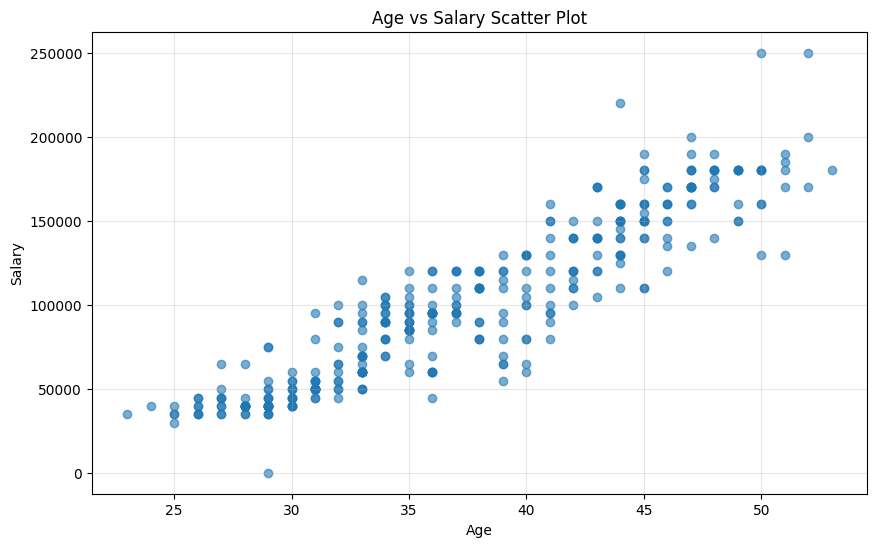

In [56]:
# Merge people_df with salary_df to get age and salary data
merged_df = people_df.merge(salary_df, on='id', how='inner')

# Create scatter plot of Age vs Salary
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Age'], merged_df['Salary'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary Scatter Plot')
plt.grid(True, alpha=0.3)
plt.show()

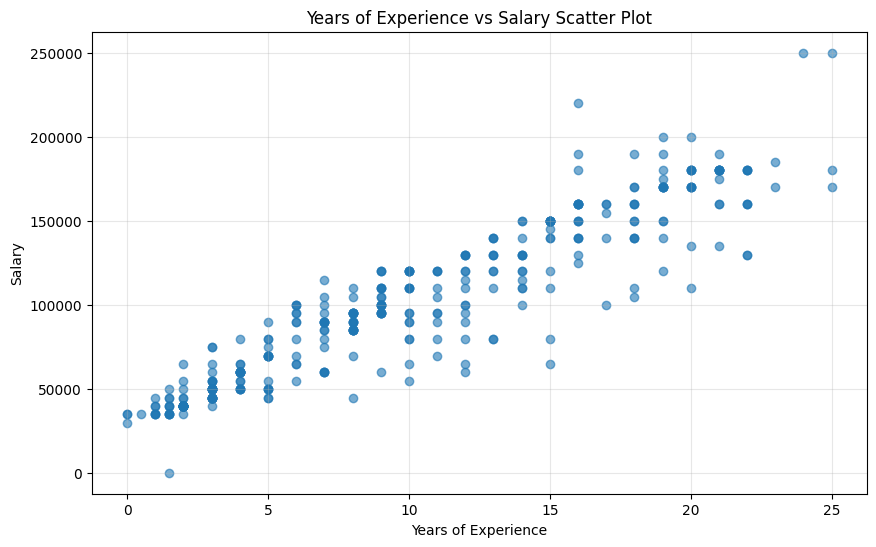

In [57]:
# Create scatter plot of Years of Experience vs Salary
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Years of Experience'], merged_df['Salary'], alpha=0.6)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs Salary Scatter Plot')
plt.grid(True, alpha=0.3)
plt.show()

### Salaries

In [36]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      375 non-null    int64  
 1   Salary  373 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.0 KB


In [37]:
salary_df.head()

,id,Salary
0,0,90000.0
1,1,65000.0
2,2,150000.0
3,3,60000.0
4,4,200000.0


In [38]:
salary_df.describe()

,id,Salary
count,375.000000,373.000000
mean,187.000000,100577.345845
std,108.397417,48240.013482
min,0.000000,350.000000
25%,93.500000,55000.000000
50%,187.000000,95000.000000
75%,280.500000,140000.000000
max,374.000000,250000.000000


### Descriptions

In [39]:
description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           375 non-null    int64 
 1   Description  372 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.0+ KB


In [40]:
description_df.head()

,id,Description
0,0,I am a 32-year-old male working as a Software ...
1,1,I am a 28-year-old data analyst with a Master'...
2,2,I am a 45-year-old Senior Manager with a PhD a...
3,3,I am a 36-year-old female Sales Associate with...
4,4,I am a 52-year-old male with over two decades ...


In [41]:
description_df['Description'].dropna().sample(5).tolist()

["I am a 48-year-old HR Manager with a Bachelor's degree and 18 years of extensive experience in human resources. My expertise includes talent acquisition, employee relations, and organizational development. I excel in creating inclusive and productive workplaces, navigating complex employee issues with empathy and professionalism. My role involves overseeing recruitment processes, developing training programs, and implementing performance management systems. I am committed to continuous learning and staying updated with the latest HR trends and technologies, which enables me to introduce innovative solutions that enhance employee engagement and drive organizational performance.",
 "As a 33-year-old Web Developer with a Bachelor's degree and six years of experience, I specialize in designing, coding, and modifying websites to meet client specifications. My expertise includes HTML, CSS, JavaScript, and content management systems like WordPress and Joomla, as well as backend technologies

# FE Ideas

- Number of words in description
- Number of verbs in description
- Number of adjectives in description

- Ratio salary/age 
- Ratio salary/experience

- Job title breakdown -> seniority, area, job type
- Binary feature for has seniority 



# Testing ideas

- Check description matches people table
- Check experience makes sense with age
- Assert that number of words is the same using different methods. I.e split by space, using regex, etc
